# Importancia de Caracteriesticas
##### Adaptado de  **[Interpretable Machine Learning with Python](https://www.packtpub.com/product/interpretable-machine-learning-with-python/9781800203907)** por  Serg Masís, published by Packt

## Preparaciopnes


### Instalación de Librerias

In [39]:
#!pip install --upgrade machine-learning-datasets
#!pip install git+https://github.com/SauceCat/PDPbox.git
#!pip install --upgrade pycebox

### Carga de Librerias


In [101]:
import math
import machine_learning_datasets as mldatasets
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics, linear_model, tree, discriminant_analysis,\
                    ensemble, neural_network, inspection
from lightgbm import LGBMClassifier

import matplotlib.pyplot as plt
from pdpbox import pdp
from pycebox.ice import ice, ice_plot

### Entendimiento y Prepración de datos

In [102]:
birthorder_df = mldatasets.load("personality-birthorder", prepare=True)

https://openpsychometrics.org/_rawdata/FBPS-ValidationData.zip downloaded to C:\Users\Juanes Mejía\Desktop\Github\GithubBcol\formacion_interpml\Notebooks\data\FBPS-ValidationData.zip
C:\Users\Juanes Mejía\Desktop\Github\GithubBcol\formacion_interpml\Notebooks\data\FBPS-ValidationData.zip uncompressed to C:\Users\Juanes Mejía\Desktop\Github\GithubBcol\formacion_interpml\Notebooks\data\FBPS-ValidationData
1 dataset files found in C:\Users\Juanes Mejía\Desktop\Github\GithubBcol\formacion_interpml\Notebooks\data\FBPS-ValidationData folder
parsing C:\Users\Juanes Mejía\Desktop\Github\GithubBcol\formacion_interpml\Notebooks\data\FBPS-ValidationData\FBPS-ValidationData/FBPS-ValidationData.csv


In [103]:
birthorder_df.shape

(25813, 97)

In [104]:
birthorder_df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'age', 'engnat', 'birthn', 'EXT1',
       'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10',
       'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9',
       'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8',
       'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7',
       'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6',
       'OPN7', 'OPN8', 'OPN9', 'OPN10', 'screensize', 'introelapse',
       'testelapse', 'endelapse', 'gender_undefined', 'gender_male',
       'gender_female', 'gender_other', 'country_AU', 'country_CA',
       'country_GB', 'country_IE', 'country_NZ', 'country_US',
       'source_undefined', 'source_google', 'source_direct', 'birthorder'],
      dtype='object')

In [105]:
rand = 9
y = birthorder_df['birthorder']
X = birthorder_df.drop(['birthorder'], axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=rand)

## Medición de Impacto de las Caracteristicas sobre la Var Respuesta


### Entrenameinto de modelos de Clasificación

In [106]:
class_models = {  
        #Tree
        'decision_tree':{'model': tree.\
                         DecisionTreeClassifier(max_depth=6, random_state=rand,\
                                                class_weight='balanced')},
        #Ensemble Methods
        'gradient_boosting':{'model':ensemble.\
                             GradientBoostingClassifier(n_estimators=200,\
                                                        max_depth=4, subsample=0.5,\
                                                        learning_rate=0.05)},
        'random_forest':{'model':ensemble.\
                         RandomForestClassifier(max_depth=11, n_estimators=300,\
                                                max_features='sqrt', random_state=rand)},
    
        'lightgbm':{'model':LGBMClassifier(objective='multiclass', random_state=rand)},
    
        #Generalized Linear Models (GLMs)
        'logistic':{'model': linear_model.\
                    LogisticRegression(multi_class='ovr', solver='lbfgs',\
                                       class_weight='balanced', max_iter=500)},
        #Discriminant Analysis
        'lda':{'model':discriminant_analysis.\
               LinearDiscriminantAnalysis(n_components=2)},
        #Neural Networks
        'mlp':{'model':make_pipeline(StandardScaler(), neural_network.\
                                     MLPClassifier(hidden_layer_sizes=(11,),\
                                                   early_stopping=True, random_state=rand,\
                                                   validation_fraction=0.25, max_iter=500))}
    }




In [107]:
for model_name in class_models.keys():
    fitted_model = class_models[model_name]['model'].fit(X_train, y_train) 
    y_train_pred = fitted_model.predict(X_train)
    y_test_pred = fitted_model.predict(X_test)
    class_models[model_name]['fitted'] = fitted_model
    class_models[model_name]['preds'] = y_test_pred
    class_models[model_name]['Accuracy_train'] =\
        metrics.accuracy_score(y_train, y_train_pred)
    class_models[model_name]['Accuracy_test'] =\
        metrics.accuracy_score(y_test, y_test_pred)
    class_models[model_name]['Recall_train'] =\
        metrics.recall_score(y_train, y_train_pred, average='weighted')
    class_models[model_name]['Recall_test'] =\
        metrics.recall_score(y_test, y_test_pred, average='weighted')
    class_models[model_name]['Precision_train'] =\
        metrics.precision_score(y_train, y_train_pred, average='weighted')
    class_models[model_name]['Precision_test'] =\
        metrics.precision_score(y_test, y_test_pred, average='weighted')
    class_models[model_name]['F1_test'] =\
        metrics.f1_score(y_test, y_test_pred, average='weighted')
    class_models[model_name]['MCC_test'] =\
        metrics.matthews_corrcoef(y_test, y_test_pred)

In [109]:
class_metrics = pd.DataFrame.\
    from_dict(class_models, 'index')[['Accuracy_train', 'Accuracy_test',\
                                      'Recall_train', 'Recall_test',\
                                      'Precision_train', 'Precision_test',\
                                      'F1_test', 'MCC_test']]
with pd.option_context('display.precision', 3):
    html = class_metrics.sort_values(by='MCC_test', ascending=False).style.\
        background_gradient(cmap='plasma', low=0.43, high=0.63,\
                            subset=['Accuracy_train', 'Accuracy_test']).\
        background_gradient(cmap='viridis', low=0.63, high=0.43,
                            subset=['F1_test'])
html

,Accuracy_train,Accuracy_test,Recall_train,Recall_test,Precision_train,Precision_test,F1_test,MCC_test
decision_tree,0.497,0.464,0.497,0.464,0.541,0.494,0.441,0.246
logistic,0.498,0.498,0.498,0.498,0.499,0.498,0.496,0.238
gradient_boosting,0.628,0.500,0.628,0.500,0.639,0.496,0.487,0.237
lightgbm,0.796,0.495,0.796,0.495,0.809,0.489,0.480,0.230
mlp,0.522,0.494,0.522,0.494,0.517,0.485,0.480,0.223
lda,0.501,0.492,0.501,0.492,0.500,0.489,0.477,0.201
random_forest,0.912,0.484,0.912,0.484,0.921,0.478,0.447,0.198


In [9]:
print('NIR: %.4f' %\
      (y_train[y_train==1].shape[0]/y_train.shape[0]))

NIR: 0.4215


### Importancia de Caracteristicas de Modelos basados en Árboles 

In [114]:
dt_imp_df = pd.DataFrame({\
                'name': X_train.columns,
                'dt_imp': class_models['decision_tree']['fitted'].\
                          feature_importances_})
gb_imp_df = pd.DataFrame({\
                'name': X_train.columns,
                'gb_imp': class_models['gradient_boosting']['fitted'].\
                          feature_importances_})
lgb_imp_df = pd.DataFrame({\
                'name': X_train.columns,
                'lgb_imp': class_models['lightgbm']['fitted'].\
                          feature_importances_})
rf_imp_df = pd.DataFrame({\
                'name': X_train.columns,
                'rf_imp': class_models['random_forest']['fitted'].\
                         feature_importances_})

In [115]:
dt_rank_df = pd.DataFrame({'dt_rank':\
                           dt_imp_df['dt_imp'].\
                           rank(method='first',\
                                ascending=False).astype(int)})
gb_rank_df = pd.DataFrame({'gb_rank':\
                           gb_imp_df['gb_imp'].\
                           rank(method='first',\
                                ascending=False).astype(int)})
lgb_rank_df = pd.DataFrame({'lgb_rank':\
                           lgb_imp_df['lgb_imp'].\
                           rank(method='first',\
                                ascending=False).astype(int)})
rf_rank_df = pd.DataFrame({'rf_rank':\
                           rf_imp_df['rf_imp'].\
                           rank(method='first',\
                                ascending=False).astype(int)})

In [116]:
dfs = [pd.concat((dt_imp_df, dt_rank_df), axis=1), pd.concat((gb_imp_df, gb_rank_df), axis=1),pd.concat((rf_imp_df, rf_rank_df), axis=1),pd.concat((lgb_imp_df, lgb_rank_df), axis=1)]

# solution 1 (fast)
tree_ranks_df = pd.concat(dfs, join='outer', axis=1)

In [118]:
tree_ranks_df

,name,dt_imp,dt_rank,name,gb_imp,gb_rank,name,rf_imp,rf_rank,name,lgb_imp,lgb_rank
0,Q1,0.025340,2,Q1,0.022592,6,Q1,0.016135,6,Q1,168,6
1,Q2,0.000000,41,Q2,0.004557,71,Q2,0.008004,67,Q2,104,25
2,Q3,0.002304,20,Q3,0.004748,67,Q3,0.009316,21,Q3,77,60
3,Q4,0.000000,42,Q4,0.008564,13,Q4,0.010420,9,Q4,114,12
4,Q5,0.001792,34,Q5,0.006975,25,Q5,0.009554,18,Q5,108,19
...,...,...,...,...,...,...,...,...,...,...,...,...
91,country_NZ,0.000000,92,country_NZ,0.000779,95,country_NZ,0.000690,93,country_NZ,5,94
92,country_US,0.000000,93,country_US,0.001554,87,country_US,0.003170,84,country_US,24,88
93,source_undefined,0.000000,94,source_undefined,0.001664,86,source_undefined,0.003050,85,source_undefined,37,82
94,source_google,0.000000,95,source_google,0.000925,92,source_google,0.003204,82,source_google,30,84


In [119]:

tree_ranks_df['avg_rank'] = (tree_ranks_df['dt_rank'] +\
                            tree_ranks_df['gb_rank'] + \
                            tree_ranks_df['rf_rank'] + \
                            tree_ranks_df['lgb_rank'])/4
tree_ranks_df.sort_values(by='avg_rank')

,name,dt_imp,dt_rank,name,gb_imp,gb_rank,name,rf_imp,rf_rank,name,lgb_imp,lgb_rank,avg_rank
28,birthn,0.851533,1,birthn,0.372944,1,birthn,0.196067,1,birthn,330,3,1.50
81,testelapse,0.013708,3,testelapse,0.036627,2,testelapse,0.027307,2,testelapse,495,1,2.00
26,age,0.006679,7,age,0.028852,4,age,0.025065,3,age,329,4,4.50
80,introelapse,0.005056,9,introelapse,0.029120,3,introelapse,0.022142,5,introelapse,332,2,4.75
0,Q1,0.025340,2,Q1,0.022592,6,Q1,0.016135,6,Q1,168,6,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,country_GB,0.000000,90,country_GB,0.001368,89,country_GB,0.002023,91,country_GB,14,92,90.50
86,gender_other,0.000000,88,gender_other,0.001395,88,gender_other,0.000678,94,gender_other,8,93,90.75
90,country_IE,0.000000,91,country_IE,0.001148,90,country_IE,0.000577,95,country_IE,1,95,92.75
91,country_NZ,0.000000,92,country_NZ,0.000779,95,country_NZ,0.000690,93,country_NZ,5,94,93.50


### Importancia de Caracteristicas para Regresión Logistica

In [120]:
print(class_models['logistic']['fitted'].coef_.shape)

(3, 96)


In [121]:
stdv = np.std(X_train, 0)
lr_imp_df = pd.DataFrame({\
                'name': X_train.columns,\
                'first_coef_norm':\
                          class_models['logistic']['fitted'].coef_[0] * stdv,\
                'middle_coef_norm':\
                          class_models['logistic']['fitted'].coef_[1] * stdv,\
                'last_coef_norm':\
                          class_models['logistic']['fitted'].coef_[2] * stdv}).\
            reset_index(drop=True)

In [122]:
class_priors = class_models['lda']['fitted'].priors_
print(class_priors)

[0.42147566 0.23701862 0.34150572]


In [123]:
lr_imp_df['coef_weighted_avg'] = (abs(lr_imp_df['first_coef_norm']) * class_priors[0]) +\
                                 (abs(lr_imp_df['middle_coef_norm']) * class_priors[1]) +\
                                 (abs(lr_imp_df['last_coef_norm']) * class_priors[2])

In [124]:
lr_imp_df.\
    sort_values(by='coef_weighted_avg', ascending=False).style.\
    background_gradient(cmap='viridis', low=-0.1, high=0.1,\
                        subset=['first_coef_norm',\
                                'middle_coef_norm', 'last_coef_norm'])

,name,first_coef_norm,middle_coef_norm,last_coef_norm,coef_weighted_avg
28,birthn,-0.486377,1.345265,-0.406325,0.662611
0,Q1,0.123360,0.020986,-0.149014,0.107856
12,Q13,0.085774,-0.037699,-0.063697,0.066840
15,Q16,0.063253,-0.054173,-0.027473,0.048882
19,Q20,-0.058498,0.049803,0.022709,0.044215
9,Q10,0.052123,-0.019351,-0.045739,0.042175
37,EXT9,0.028827,-0.080394,0.027615,0.040635
1,Q2,0.010861,-0.079410,0.048794,0.040063
51,AGR3,-0.042100,-0.018615,0.049641,0.039109
24,Q25,-0.045883,0.036660,0.019753,0.034774


### Importancia de Caracteristicas para Analisi Lineal Discriminante

In [125]:
class_models['lda']['fitted'].coef_.shape

(3, 96)

In [126]:
lda_imp_df = pd.DataFrame({\
                'name': X_train.columns,\
                'first_coef_norm':\
                          class_models['lda']['fitted'].coef_[0] * stdv,\
                'middle_coef_norm':\
                          class_models['lda']['fitted'].coef_[1] * stdv,\
                'last_coef_norm':\
                          class_models['lda']['fitted'].coef_[2] * stdv}).\
            reset_index(drop=True)

In [127]:
lda_imp_df['coef_weighted_avg'] = (abs(lda_imp_df['first_coef_norm']) * class_priors[0]) +\
                                 (abs(lda_imp_df['middle_coef_norm']) * class_priors[1]) +\
                                 (abs(lda_imp_df['last_coef_norm']) * class_priors[2])

In [128]:
lda_imp_df.\
    sort_values(by='coef_weighted_avg', ascending=False).style.\
    background_gradient(cmap='viridis', low=-0.1, high=0.1,\
                        subset=['first_coef_norm',\
                                'middle_coef_norm', 'last_coef_norm'])

,name,first_coef_norm,middle_coef_norm,last_coef_norm,coef_weighted_avg
28,birthn,-0.315051,1.002922,-0.307242,0.475423
0,Q1,0.090613,-0.012808,-0.102942,0.076382
12,Q13,0.056740,-0.033932,-0.046477,0.047829
51,AGR3,-0.039195,-0.005623,0.052276,0.035705
15,Q16,0.038815,-0.035811,-0.023050,0.032719
6,Q7,-0.004032,0.064381,-0.039707,0.030519
16,Q17,0.035050,-0.009894,-0.036390,0.029545
24,Q25,-0.034672,0.034036,0.019169,0.029227
77,OPN9,-0.033481,0.045381,0.009825,0.028223
19,Q20,-0.030615,0.038022,0.011395,0.025807


## Importancia de Caracteristicas por Permutaciones

In [129]:
for model_name in class_models.keys():
    fitted_model = class_models[model_name]['fitted']
    permutation_imp = inspection.permutation_importance(\
                        fitted_model, X_test, y_test, n_jobs=-1,\
                        scoring='accuracy', n_repeats=8,\
                        random_state=rand)
    class_models[model_name]['importances_mean'] =\
                        permutation_imp.importances_mean

In [130]:
perm_imp_df = pd.DataFrame({
                'name': X_train.columns,\
                'dt_imp': class_models['decision_tree']['importances_mean'],\
                'gb_imp': class_models['gradient_boosting']['importances_mean'],\
                'lgb_imp': class_models['lightgbm']['importances_mean'],\
                'rf_imp': class_models['random_forest']['importances_mean'],\
                'log_imp': class_models['logistic']['importances_mean'],\
                'lda_imp': class_models['lda']['importances_mean'],\
                'mlp_imp': class_models['mlp']['importances_mean']}).\
            reset_index(drop=True)

In [131]:
perm_imp_df

,name,dt_imp,gb_imp,lgb_imp,rf_imp,log_imp,lda_imp,mlp_imp
0,Q1,0.008320,0.007733,0.006823,0.000880,0.011137,0.011401,0.008232
1,Q2,0.000000,0.002450,-0.001687,-0.000514,0.002216,-0.001189,0.000572
2,Q3,-0.000514,-0.000249,0.002010,-0.000910,0.000895,0.000367,0.002568
3,Q4,0.000000,0.001511,0.001893,0.002054,0.003463,0.000895,0.002817
4,Q5,-0.000792,0.002260,0.001189,-0.000191,0.003037,0.001247,0.001746
...,...,...,...,...,...,...,...,...
91,country_NZ,0.000000,0.000088,0.000088,-0.000367,0.000000,0.000235,0.000132
92,country_US,0.000000,0.000866,0.000646,-0.000660,0.000088,0.000044,0.002803
93,source_undefined,0.000000,0.000088,-0.000968,-0.000323,-0.000073,-0.000499,0.001115
94,source_google,0.000000,0.000484,0.000748,-0.000103,-0.000132,0.000029,0.001526


In [82]:
perm_imp_df['avg_imp'] = (perm_imp_df['dt_imp'] + perm_imp_df['gb_imp'] +\
                         perm_imp_df['rf_imp'] + perm_imp_df['log_imp'] +\
                         perm_imp_df['lda_imp'] + perm_imp_df['mlp_imp']+\
                         perm_imp_df['lgb_imp'] )/7

In [83]:
perm_imp_sorted_df = perm_imp_df.round(5).\
    sort_values(by='avg_imp', ascending=False)
perm_imp_sorted_df.style.\
    background_gradient(cmap='viridis_r', low=0, high=0.2,\
                        subset=['dt_imp', 'gb_imp', 'rf_imp','lgb_imp',\
                                'log_imp', 'lda_imp', 'mlp_imp'])

,name,dt_imp,gb_imp,lgb_imp,rf_imp,log_imp,lda_imp,mlp_imp,avg_imp
28,birthn,0.138500,0.108860,0.108390,0.074610,0.115390,0.083300,0.109310,0.105480
0,Q1,0.008320,0.005000,0.006820,0.000880,0.011140,0.011400,0.008230,0.007400
12,Q13,0.000980,-0.000210,0.004170,0.001670,0.003040,0.004270,0.002830,0.002390
26,age,0.001070,0.002540,0.005660,0.004110,0.001720,-0.000820,0.001580,0.002270
51,AGR3,0.000320,0.003080,0.001340,0.000810,0.003370,0.003100,0.002950,0.002140
3,Q4,0.000000,0.000510,0.001890,0.002050,0.003460,0.000900,0.002820,0.001660
9,Q10,0.002820,0.002040,0.003920,0.000250,0.001610,0.000400,-0.000630,0.001490
14,Q15,0.000000,0.000670,0.002910,0.001980,0.001280,0.000760,0.001230,0.001260
16,Q17,0.001190,0.000600,0.001980,-0.000040,0.001790,0.001800,0.001060,0.001200
13,Q14,0.003210,0.001130,0.002220,-0.001190,0.000320,0.000380,0.001880,0.001140


In [85]:
class_models

{'decision_tree': {'model': DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                         max_depth=6, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=9, splitter='best'),
  'fitted': DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                         max_depth=6, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=9, splitter='best'),
  'preds': array([2, 2, 2, ..., 2, 2, 2], dtype=int64),
  'Accuracy_train': 0.496704

In [87]:
perm_imp_sorted_df

,name,dt_imp,gb_imp,lgb_imp,rf_imp,log_imp,lda_imp,mlp_imp,avg_imp
28,birthn,0.13850,0.10886,0.10839,0.07461,0.11539,0.08330,0.10931,0.10548
0,Q1,0.00832,0.00500,0.00682,0.00088,0.01114,0.01140,0.00823,0.00740
12,Q13,0.00098,-0.00021,0.00417,0.00167,0.00304,0.00427,0.00283,0.00239
26,age,0.00107,0.00254,0.00566,0.00411,0.00172,-0.00082,0.00158,0.00227
51,AGR3,0.00032,0.00308,0.00134,0.00081,0.00337,0.00310,0.00295,0.00214
...,...,...,...,...,...,...,...,...,...
5,Q6,0.00000,-0.00009,-0.00126,-0.00103,0.00109,-0.00025,-0.00001,-0.00022
90,country_IE,0.00000,-0.00009,-0.00010,-0.00031,0.00000,-0.00047,-0.00069,-0.00024
95,source_direct,0.00000,-0.00120,-0.00026,-0.00063,0.00012,-0.00094,0.00107,-0.00026
89,country_GB,0.00000,0.00028,0.00006,0.00051,-0.00012,-0.00063,-0.00202,-0.00027


In [88]:
pd.DataFrame.\
    from_dict(class_models, 'index')[['Accuracy_test']] -\
    perm_imp_sorted_df.iloc[0,1:8].to_numpy().reshape((7,1))

,Accuracy_test
decision_tree,0.325639
gradient_boosting,0.386269
random_forest,0.375235
lightgbm,0.419932
logistic,0.382791
lda,0.408777
mlp,0.385114


## Graficas de Dependencia Parcial

In [28]:
feature_names = ['birthn', 'Q1', 'Q13', 'age']
feature_labels = ['# of Births', 'Question #1',\
                  'Question #13', 'Age']

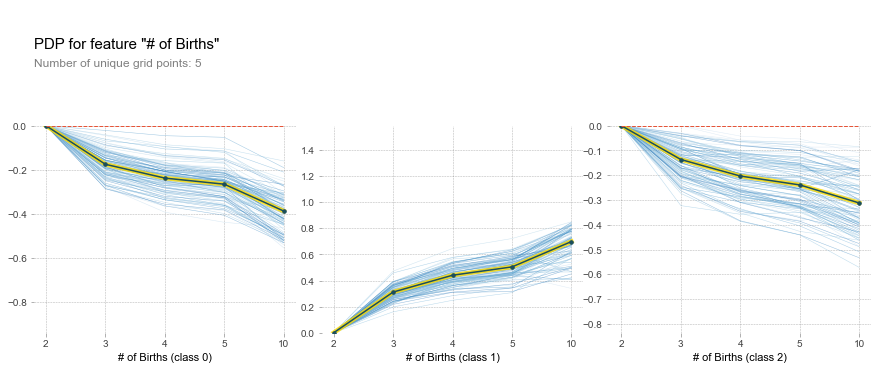

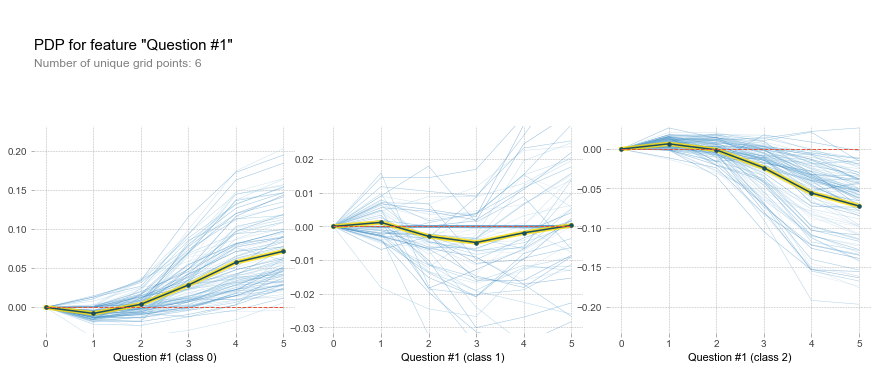

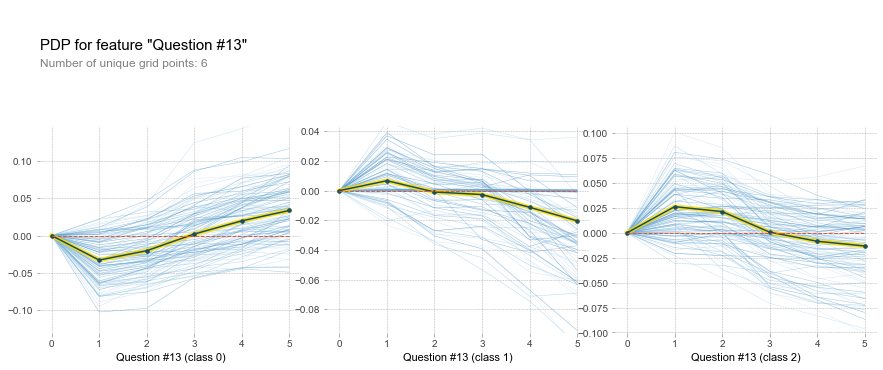

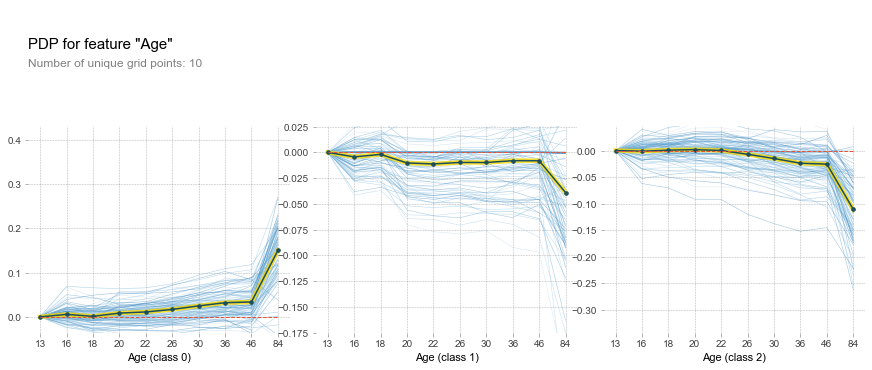

In [29]:
for i in range(len(feature_names)):
    pdp_feat_df = pdp.pdp_isolate(\
        model=class_models['gradient_boosting']['fitted'],\
        dataset=pd.concat((X_test, y_test), axis=1),\
        model_features=X_test.columns,\
        feature=feature_names[i]
    )
    fig, axes = pdp.pdp_plot(
        pdp_isolate_out=pdp_feat_df, center=True,\
        x_quantile=True, ncols=3, plot_lines=True,\
        frac_to_plot=100, figsize=(15,6),\
        feature_name=feature_labels[i]
    )

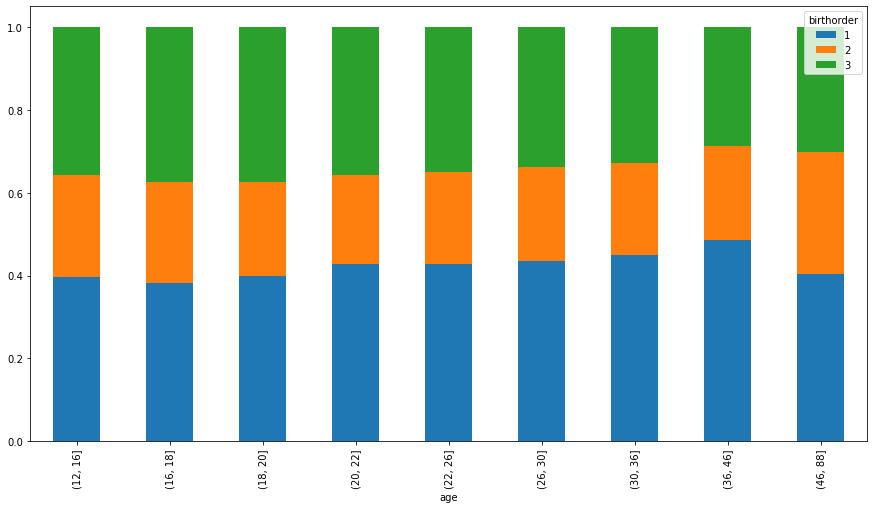

In [30]:
birthorder_abbrev_df = birthorder_df[['age', 'birthorder']]
birthorder_abbrev_df.set_index(pd.cut(\
                                  birthorder_abbrev_df['age'],\
                                  [12, 16, 18, 20, 22, 26, 30,\
                                   36, 46, 88]), inplace=True)
agegroup_birthorder_counts_s = birthorder_abbrev_df.\
                            groupby([birthorder_abbrev_df.index,\
                                     'birthorder']).size()
agegroup_counts_s = birthorder_abbrev_df.groupby(\
                                            birthorder_abbrev_df.index)\
                                            ['birthorder'].count()
agegroup_pct_birthorder_s = agegroup_birthorder_counts_s.div(\
                                                    agegroup_counts_s,\
                                                     axis=0,level=0)
agegroup_pct_birthorder_s.unstack().plot.bar(stacked=True,\
                                         figsize=(15,8))

### Interaciones en PDPs

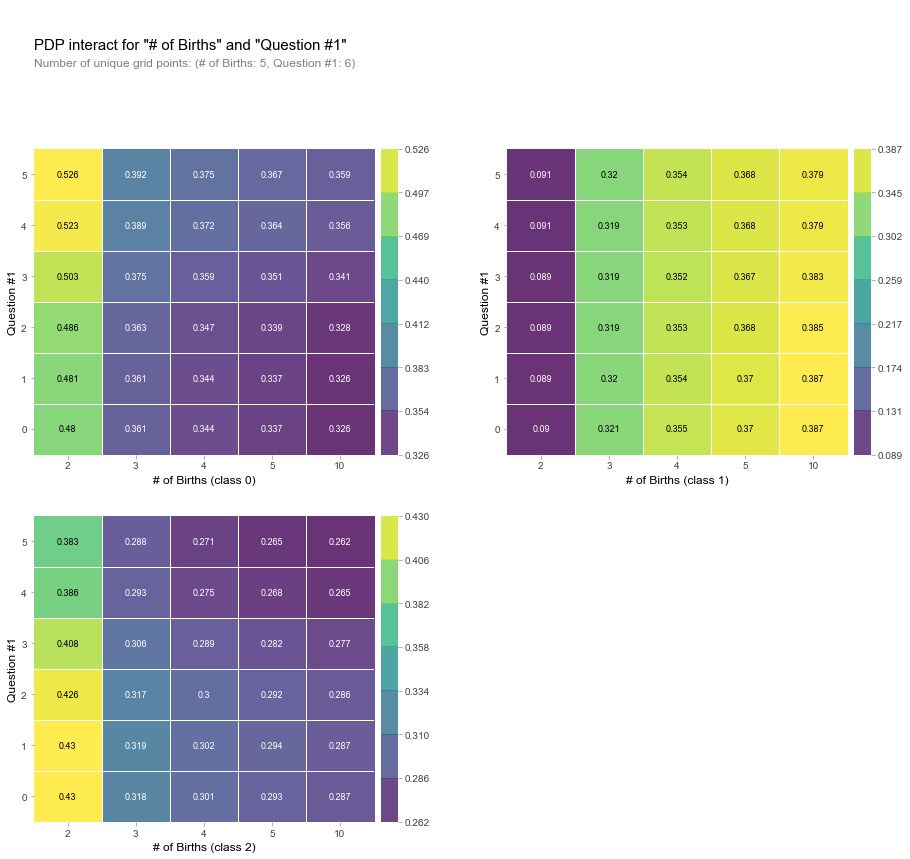

In [31]:
pdp_birthn_Q1_df = pdp.pdp_interact(
    model=class_models['random_forest']['fitted'],\
    dataset=pd.concat((X_test, y_test), axis=1),\
    model_features=X_test.columns, features=['birthn','Q1'],\
    n_jobs=-1
)
fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=pdp_birthn_Q1_df,\
    plot_type='grid', x_quantile=True,\
    ncols=2, figsize=(15,15),\
    feature_names=['# of Births','Question #1']
)

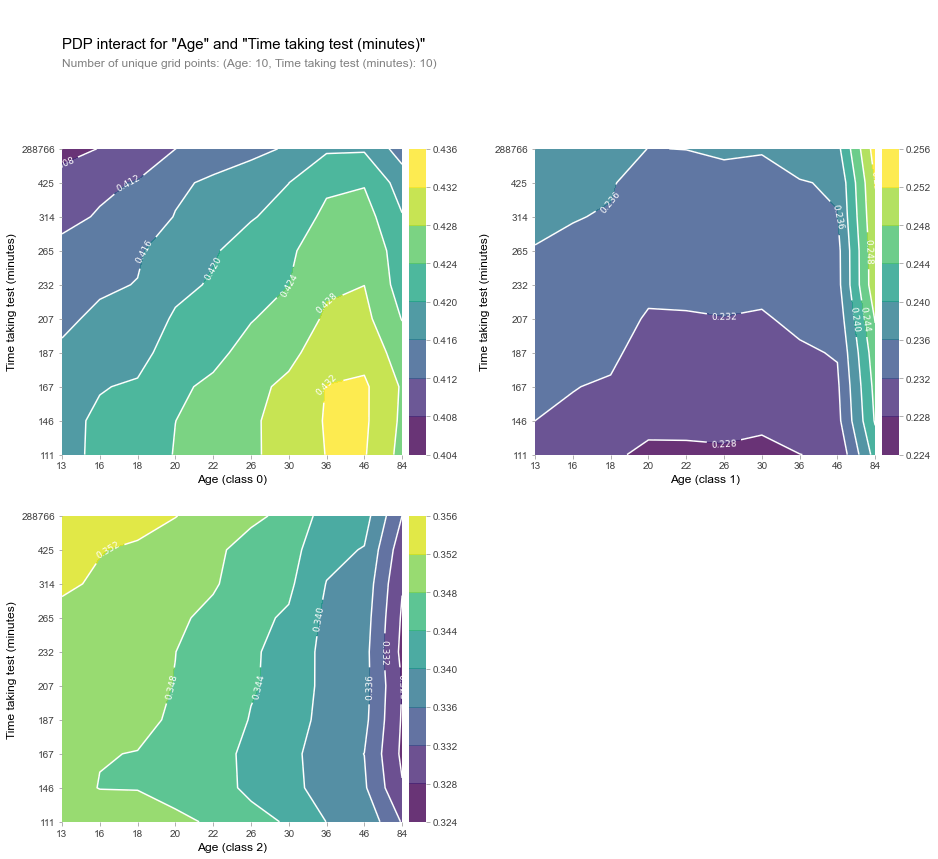

In [32]:
pdp_age_testelapse_df = pdp.pdp_interact(
    model=class_models['random_forest']['fitted'],\
    dataset=pd.concat((X_test, y_test), axis=1),\
    model_features=X_test.columns, features=['age','testelapse'],\
    n_jobs=-1
)
fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=pdp_age_testelapse_df,\
    plot_type='contour', x_quantile=True,\
    ncols=2, figsize=(15,15),\
    feature_names=['Age','Time taking test (minutes)']
)

## Graficas de Individual Conditional Expectation (ICE) 

In [33]:
np.random.seed(rand)
sample_size = 0.1
sample_idx = np.random.choice(\
                    X_test.shape[0],\
                    math.ceil(X_test.shape[0]*sample_size),\
                    replace=False)
X_test_samp = X_test.iloc[sample_idx,:]

In [34]:
def predict_prob_first_born(test_df):
    return class_models['random_forest']['fitted'].\
                                predict_proba(test_df)[:,0]
def predict_prob_middle_child(test_df):
    return class_models['random_forest']['fitted'].\
                                predict_proba(test_df)[:,1]
def predict_prob_last_born(test_df):
    return class_models['random_forest']['fitted'].\
                                predict_proba(test_df)[:,2]

In [35]:
legend_key = {0:'N/A', 1:'Disagree', 2:'Somewhat Disagree',
              3:'Neutral', 4:'Somewhat Agree', 5:'Agree'}

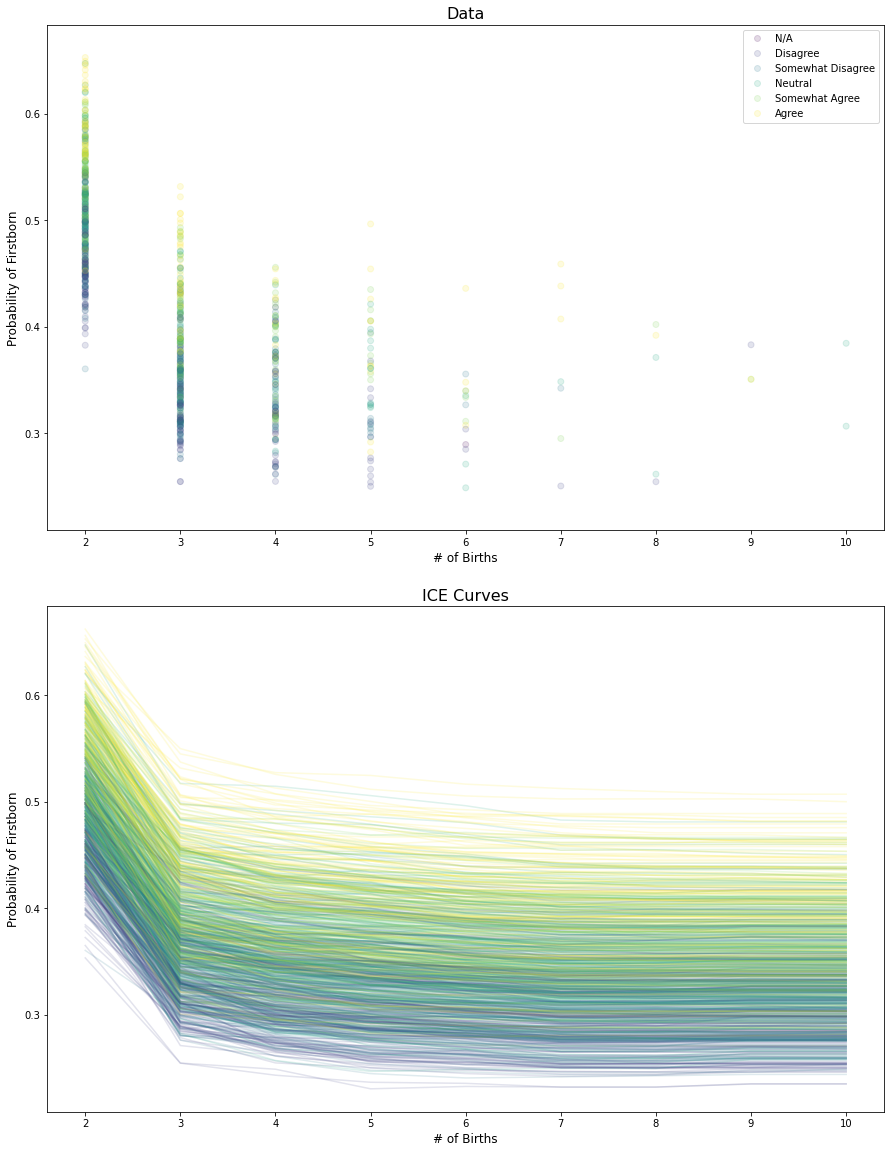

In [36]:
mldatasets.plot_data_vs_ice(predict_prob_first_born,\
                            'Probability of Firstborn',\
                            X=X_test_samp, feature_name='birthn',\
                            feature_label='# of Births',\
                            color_by='Q1', legend_key=legend_key)

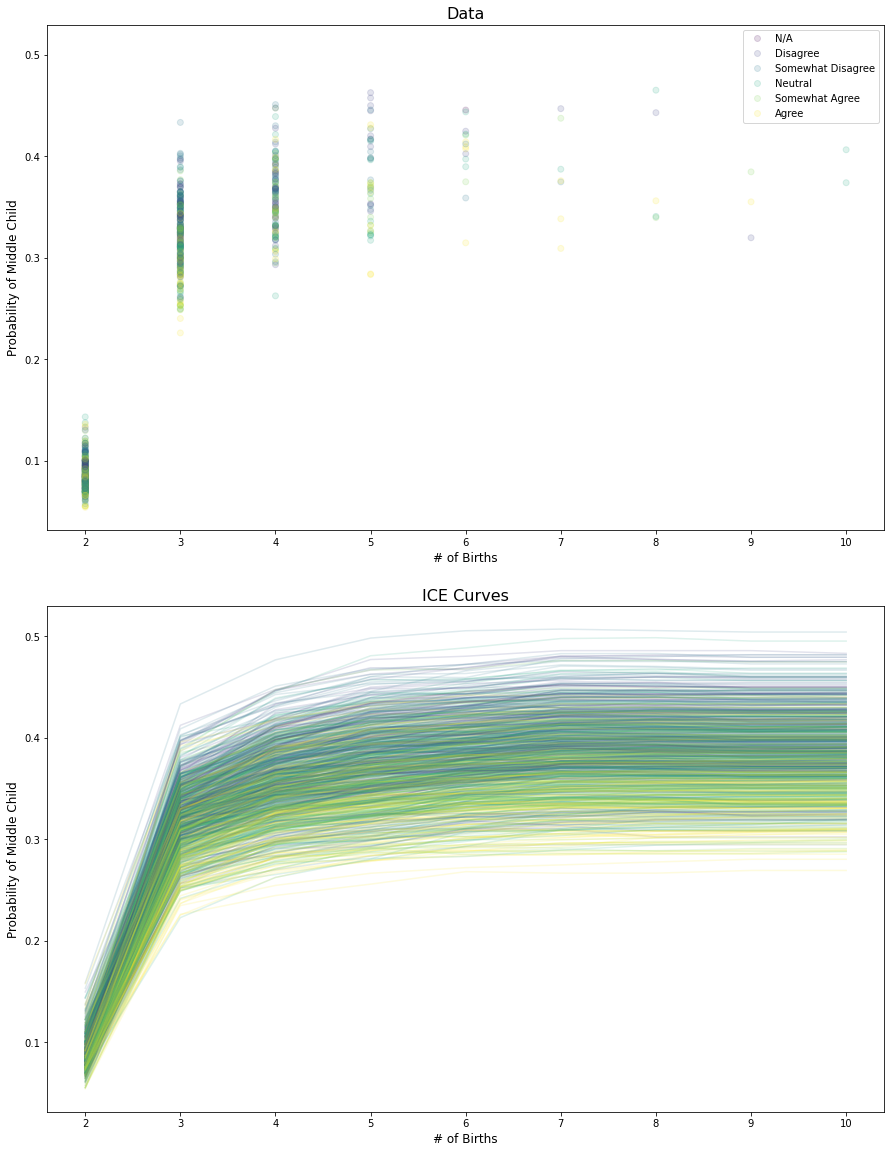

In [37]:
mldatasets.plot_data_vs_ice(predict_prob_middle_child,\
                            'Probability of Middle Child',\
                            X=X_test_samp, feature_name='birthn',\
                            feature_label='# of Births',\
                            color_by='Q1', legend_key=legend_key)

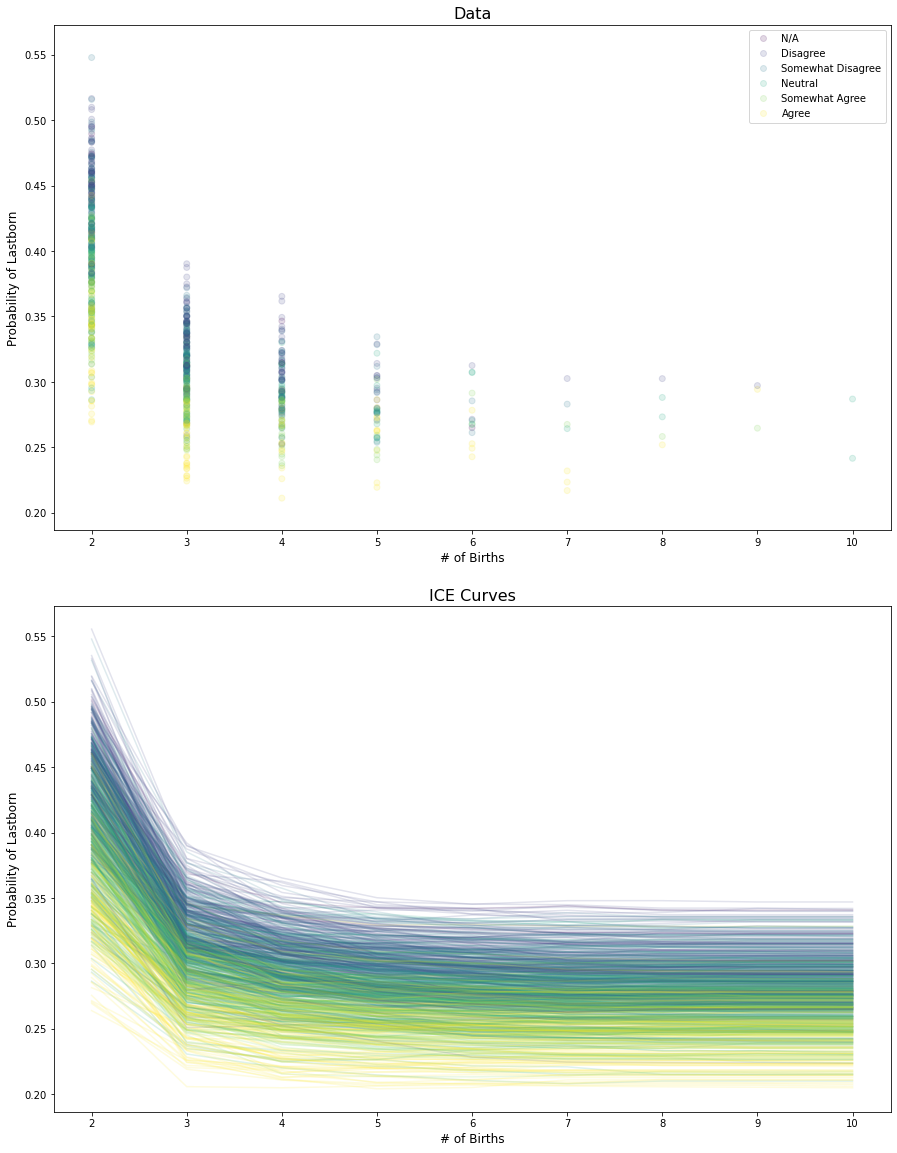

In [38]:
mldatasets.plot_data_vs_ice(predict_prob_last_born,\
                            'Probability of Lastborn',\
                            X=X_test_samp, feature_name='birthn',\
                            feature_label='# of Births',\
                            color_by='Q1', legend_key=legend_key)

## Ejemplos Adiconales


In [89]:
cvd_df = mldatasets.load("cardiovascular-disease")

https://raw.githubusercontent.com/caravanuden/cardio/master/cardio_train.csv downloaded to C:\Users\Juanes Mejía\Desktop\Github\GithubBcol\formacion_interpml\Notebooks\data\cardio_train.csv
1 dataset files found in C:\Users\Juanes Mejía\Desktop\Github\GithubBcol\formacion_interpml\Notebooks\data folder
parsing C:\Users\Juanes Mejía\Desktop\Github\GithubBcol\formacion_interpml\Notebooks\data\cardio_train.csv


In [90]:
cvd_df['age'] =  cvd_df['age'] / 365.24
cvd_df = cvd_df[(cvd_df['ap_lo'] <= 370) & (cvd_df['ap_lo'] > 0)].reset_index(drop=True)
cvd_df = cvd_df[(cvd_df['ap_hi'] <= 370) & (cvd_df['ap_hi'] > 0)].reset_index(drop=True)
cvd_df = cvd_df[cvd_df['ap_hi'] >= cvd_df['ap_lo']].reset_index(drop=True)

In [91]:
cvd_df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [97]:
y = cvd_df['cardio']
X = cvd_df.drop(['cardio'], axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)

In [98]:
rf = ensemble.RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train);

In [99]:
feature_names = ['age', 'weight', 'ap_hi', 'gender']
feature_labels = ['Edad', 'Peso',\
                  'Presion_sitolica', 'Genero']

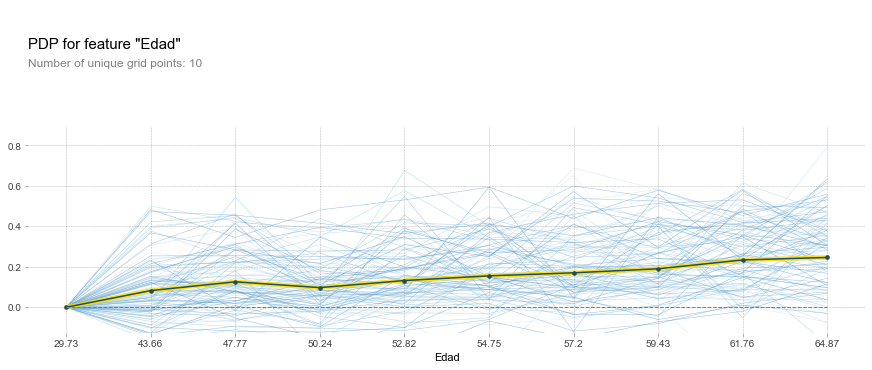

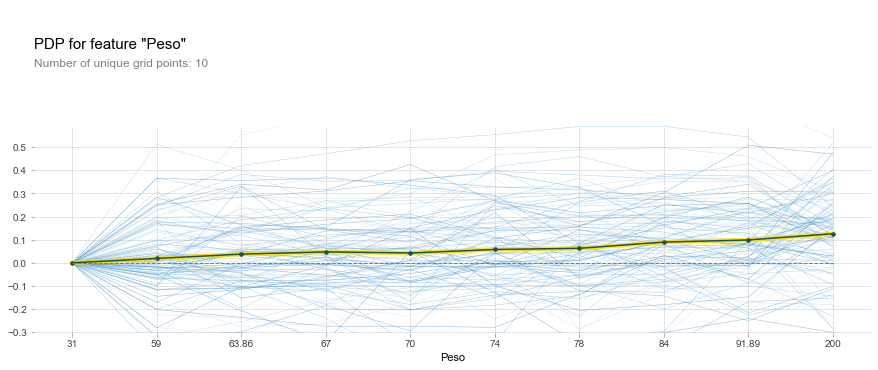

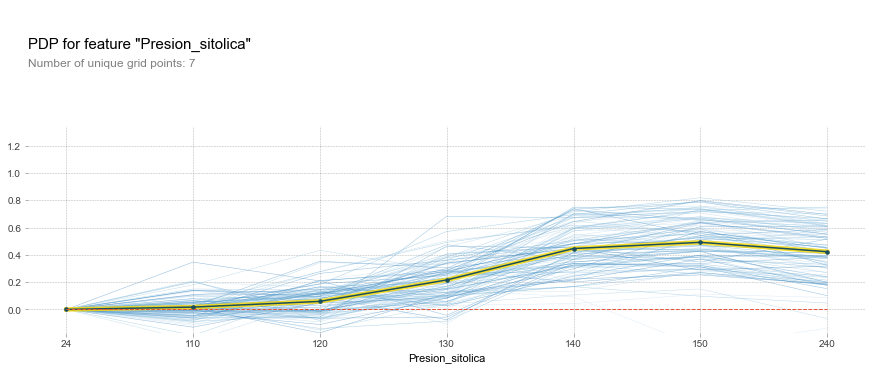

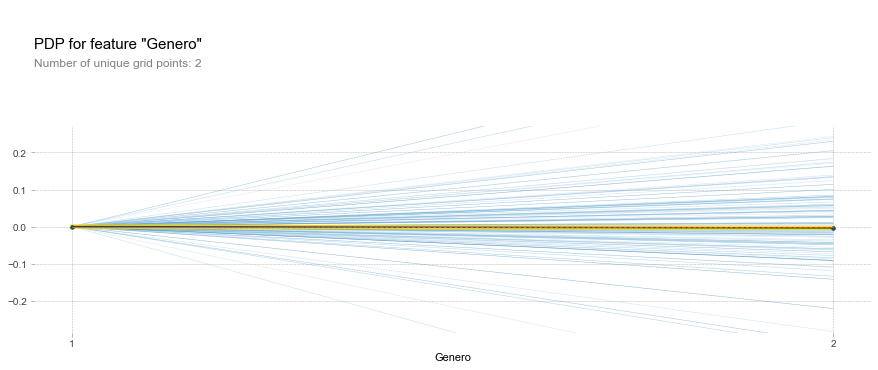

In [100]:
for i in range(len(feature_names)):
    pdp_feat_df = pdp.pdp_isolate(\
        model=rf,\
        dataset=pd.concat((X_test, y_test), axis=1),\
        model_features=X_test.columns,\
        feature=feature_names[i]
    )
    fig, axes = pdp.pdp_plot(
        pdp_isolate_out=pdp_feat_df, center=True,\
        x_quantile=True, ncols=3, plot_lines=True,\
        frac_to_plot=100, figsize=(15,6),\
        feature_name=feature_labels[i]
    )